In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [8]:
#Import Datasets
dataset_path = "~/Documents/ds/datascience/data/test_task.csv"
data = pd.read_csv(dataset_path)

In [9]:
data.head()

,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,TraderKey,...,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age,gender,bad_flag
0,708382,2016-10-06,2015-11-13,NaN,NaN,NaN,NaN,3.0,region_6,6,...,10,0,0,0,10.0,NaN,NaN,21.0,False,0
1,406305,2016-03-26,2015-09-28,1.0,0.0,0.0,2016-01-30,0.0,region_6,6,...,6,0,0,0,5.0,NaN,NaN,20.0,False,0
2,779736,2016-10-30,2015-12-21,NaN,NaN,NaN,NaN,2.0,region_1,6,...,0,5,0,0,5.0,NaN,NaN,19.0,False,0
3,556376,2016-06-29,2015-06-30,NaN,NaN,NaN,NaN,1.0,region_6,14,...,4,0,0,0,6.0,NaN,NaN,21.0,False,0
4,266968,2015-12-01,2015-08-03,NaN,NaN,NaN,NaN,0.0,region_5,22,...,0,0,0,0,3.0,NaN,NaN,33.0,False,0


## Assignment

Using the available dataset, build a model that will predict the value of the target variable bad_flag. Write a Jupyter notebook where you will argue for the choice of model and show the expected default rate at different approval levels. Explain your approach.



## Data Exploration
Let's start by reading the data, and getting familiar with its shape, and columns. We will use pandas, which is a "go-to" Python library for the analysis and manipulation of small to medium size data sets.

In [10]:
# fix a random seed for reproducible results
RANDOM_SEED = 42

In [13]:
data.shape

(4157, 22)

In [14]:
# prints a (pseudo-)random sample of 10 rows
data.sample(n=10, random_state=RANDOM_SEED)

,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,TraderKey,...,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age,gender,bad_flag
2481,798820,2016-11-07,2015-09-07,NaN,NaN,NaN,NaN,7.0,region_3,6,...,16,0,0,0,14.0,550.235369,NaN,43.0,False,0
308,612648,2016-08-18,2016-02-08,NaN,NaN,NaN,NaN,1.0,region_6,12,...,0,2,0,0,6.0,NaN,576.875277,26.0,False,0
2414,452498,2016-04-20,2016-03-12,NaN,NaN,NaN,NaN,0.0,region_2,12,...,0,2,1,0,1.0,561.999471,NaN,28.0,True,1
2720,580963,2016-07-22,2015-08-14,NaN,NaN,NaN,NaN,1.0,region_6,26,...,5,6,0,0,10.0,590.376406,NaN,30.0,False,0
463,518998,2016-06-01,2015-09-29,NaN,NaN,NaN,NaN,1.0,region_3,6,...,8,0,0,0,8.0,593.493342,NaN,47.0,False,0
1185,295047,2015-12-23,2015-12-22,NaN,NaN,NaN,NaN,NaN,region_2,6,...,0,0,0,0,NaN,NaN,NaN,19.0,False,0
96,247067,2015-11-17,2015-10-15,NaN,NaN,NaN,NaN,0.0,region_3,12,...,0,0,0,0,1.0,601.979112,NaN,27.0,False,1
2031,388069,2016-03-16,2015-10-10,NaN,NaN,NaN,NaN,1.0,region_3,6,...,2,0,0,0,3.0,NaN,NaN,24.0,False,0
1886,736698,2016-10-16,2015-10-16,2.0,1.0,0.0,2015-12-20,2.0,region_6,6,...,5,0,0,0,5.0,NaN,NaN,20.0,False,1
843,628262,2016-08-28,2015-08-08,NaN,NaN,NaN,NaN,1.0,region_3,38,...,3,0,0,0,3.0,634.387608,NaN,46.0,False,0


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4157 entries, 0 to 4156
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loanKey              4157 non-null   int64         
 1   rep_loan_date        4157 non-null   datetime64[ns]
 2   first_loan           4157 non-null   datetime64[ns]
 3   dpd_5_cnt            675 non-null    float64       
 4   dpd_15_cnt           675 non-null    float64       
 5   dpd_30_cnt           675 non-null    float64       
 6   first_overdue_date   675 non-null    object        
 7   close_loans_cnt      4142 non-null   float64       
 8   federal_district_nm  4146 non-null   object        
 9   TraderKey            4157 non-null   int64         
 10  payment_type_0       4157 non-null   int64         
 11  payment_type_1       4157 non-null   int64         
 12  payment_type_2       4157 non-null   int64         
 13  payment_type_3       4157 non-nul

In [24]:
data[[
    "dpd_5_cnt",
    "dpd_15_cnt",
    "dpd_30_cnt",
    "close_loans_cnt",
    "payment_type_0",
    "payment_type_1",
    "payment_type_2",
    "payment_type_3",
    "payment_type_4",
    "payment_type_5",
    "past_billings_cnt",
    "score_1",
    "score_2",
    "age"
]].skew()

dpd_5_cnt             2.525833
dpd_15_cnt            1.311809
dpd_30_cnt            1.635450
close_loans_cnt       4.386939
payment_type_0       30.271526
payment_type_1       11.649575
payment_type_2        1.544904
payment_type_3        4.979388
payment_type_4       17.283217
payment_type_5        0.000000
past_billings_cnt     1.254598
score_1              -0.739269
score_2              -0.291779
age                   0.733484
dtype: float64

In [17]:
data[[
    "dpd_5_cnt",
    "dpd_15_cnt",
    "dpd_30_cnt",
    "close_loans_cnt",
    "payment_type_0",
    "payment_type_1",
    "payment_type_2",
    "payment_type_3",
    "payment_type_4",
    "payment_type_5",
    "past_billings_cnt",
    "score_1",
    "score_2",
    "age"
]].describe()

,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,close_loans_cnt,payment_type_0,payment_type_1,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age
count,675.000000,675.000000,675.000000,4142.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.0,3909.000000,3507.000000,239.000000,4157.000000
mean,1.444444,0.733333,0.280000,1.184693,0.018523,0.596103,3.755834,0.758239,0.019485,0.0,4.979023,578.911345,552.546610,34.561222
std,0.900599,0.764572,0.502339,1.723715,0.330359,2.564887,3.810703,2.212487,0.245960,0.0,3.491556,48.989869,21.492840,10.834143
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,384.220628,485.874267,18.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,2.000000,547.429791,535.545724,26.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.0,4.000000,588.531315,556.757944,32.000000
75%,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.0,6.000000,612.323090,567.608057,41.000000
max,7.000000,5.000000,3.000000,31.000000,15.000000,81.000000,33.000000,35.000000,7.000000,0.0,21.000000,691.528420,603.311653,74.000000


In [18]:
# next, we 'describe' the categorical columns
# note that the output differs between the two calls to `.describe()`
data[[
    "federal_district_nm",
    "gender"
]].describe()

,federal_district_nm,gender
count,4146,4157
unique,8,2
top,region_3,False
freq,1595,3570


In [21]:
# There's a lot of information contained in the last few cell outputs. Take some time to study the output and draw some key insights about the data provided.
# We can also present some visualizations to better understand the data.

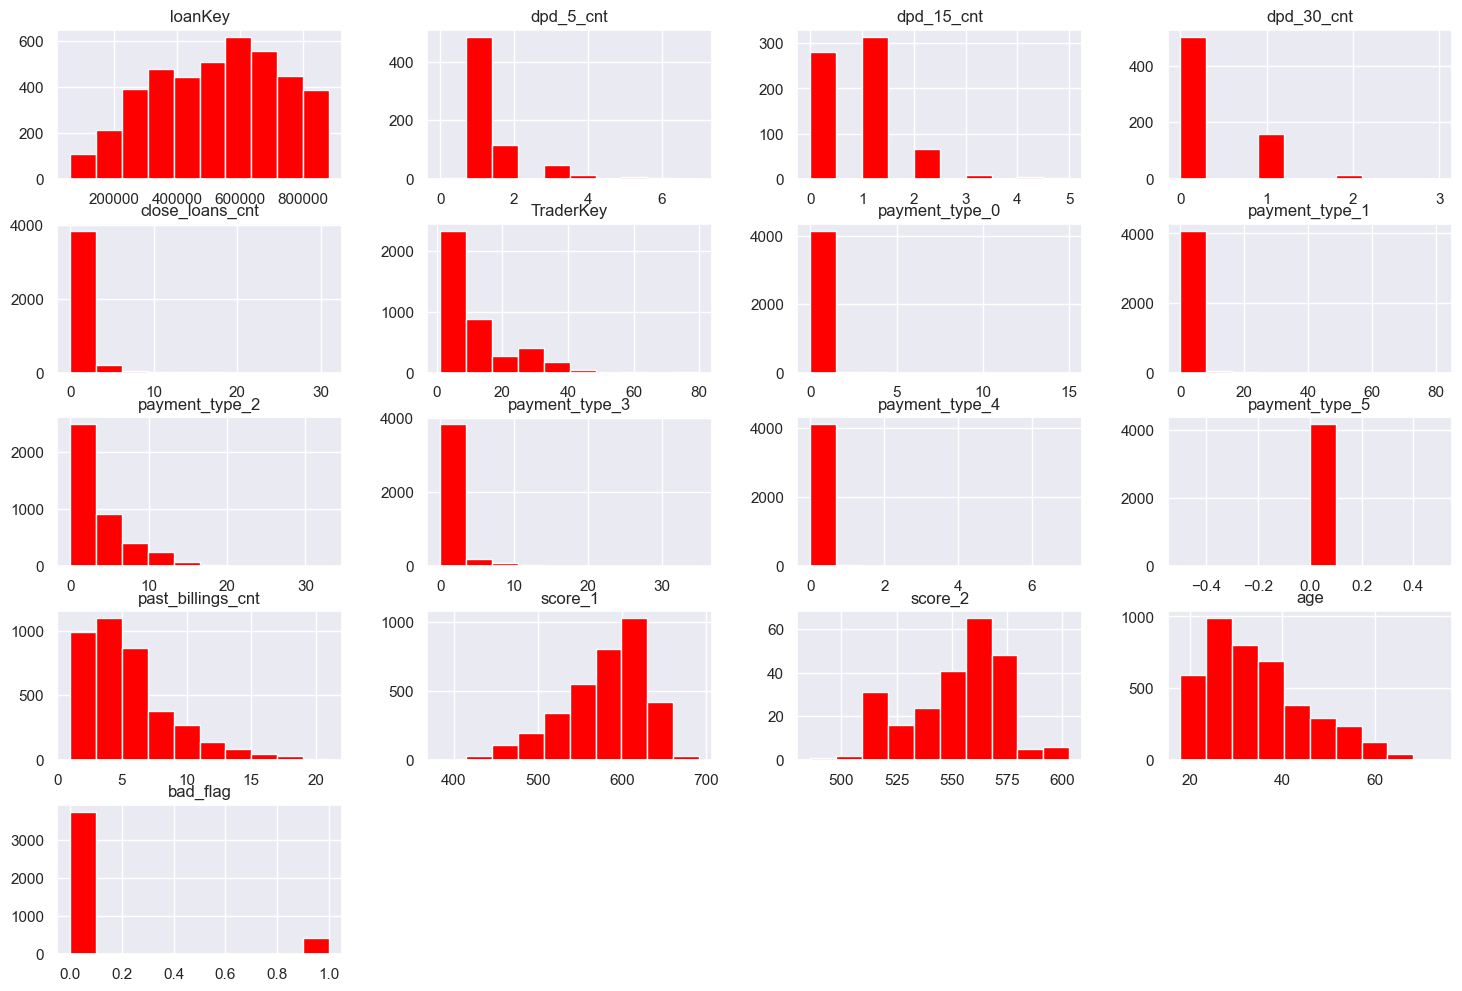

In [22]:
_  =  data.hist(figsize=(18, 12), color="red")


In [25]:
# target variable distribution
data["bad_flag"].value_counts()

bad_flag
0    3740
1     417
Name: count, dtype: int64

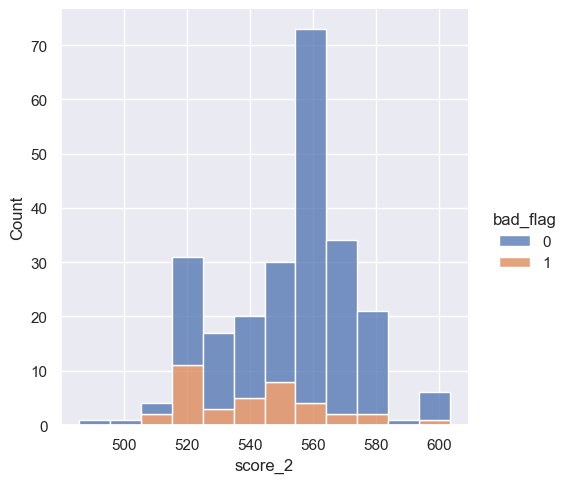

In [28]:
from seaborn import displot
_ = displot(data=data, x="score_2", hue="bad_flag", multiple="stack")

In [29]:
data[["rep_loan_date", "first_loan"]] = data[["rep_loan_date", "first_loan"]].apply(pd.to_datetime)

In [33]:
data["days_between_rep_and_first_loan"] = (data["rep_loan_date"] - data["first_loan"]).dt.days

In [34]:
data.head()

,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,TraderKey,...,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age,gender,bad_flag,days_between_rep_and_first_loan
0,708382,2016-10-06,2015-11-13,NaN,NaN,NaN,NaN,3.0,region_6,6,...,0,0,0,10.0,NaN,NaN,21.0,False,0,328
1,406305,2016-03-26,2015-09-28,1.0,0.0,0.0,2016-01-30,0.0,region_6,6,...,0,0,0,5.0,NaN,NaN,20.0,False,0,180
2,779736,2016-10-30,2015-12-21,NaN,NaN,NaN,NaN,2.0,region_1,6,...,5,0,0,5.0,NaN,NaN,19.0,False,0,314
3,556376,2016-06-29,2015-06-30,NaN,NaN,NaN,NaN,1.0,region_6,14,...,0,0,0,6.0,NaN,NaN,21.0,False,0,365
4,266968,2015-12-01,2015-08-03,NaN,NaN,NaN,NaN,0.0,region_5,22,...,0,0,0,3.0,NaN,NaN,33.0,False,0,120


In [38]:
federal_districts = pd.get_dummies(data["federal_district_nm"], prefix="federal")

In [39]:
federal_districts

,federal_region_0,federal_region_1,federal_region_2,federal_region_3,federal_region_4,federal_region_5,federal_region_6,federal_region_7
0,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,True,False
2,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...
4152,False,False,False,False,False,True,False,False
4153,False,False,True,False,False,False,False,False
4154,False,False,True,False,False,False,False,False
4155,False,False,False,False,False,False,True,False


In [40]:
data = pd.concat(objs=[data, federal_districts], axis=1)

In [44]:
print(data.head())

   loanKey rep_loan_date first_loan  dpd_5_cnt  dpd_15_cnt  dpd_30_cnt  \
0   708382    2016-10-06 2015-11-13        0.0         0.0         0.0   
1   406305    2016-03-26 2015-09-28        1.0         0.0         0.0   
2   779736    2016-10-30 2015-12-21        0.0         0.0         0.0   
3   556376    2016-06-29 2015-06-30        0.0         0.0         0.0   
4   266968    2015-12-01 2015-08-03        0.0         0.0         0.0   

  first_overdue_date  close_loans_cnt federal_district_nm  TraderKey  ...  \
0                  0              3.0            region_6          6  ...   
1         2016-01-30              0.0            region_6          6  ...   
2                  0              2.0            region_1          6  ...   
3                  0              1.0            region_6         14  ...   
4                  0              0.0            region_5         22  ...   

   bad_flag  days_between_rep_and_first_loan  federal_region_0  \
0         0               

In [43]:
data.fillna(value=0, inplace=True)

In [45]:
data.sample(n=7, random_state=RANDOM_SEED)

,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,TraderKey,...,bad_flag,days_between_rep_and_first_loan,federal_region_0,federal_region_1,federal_region_2,federal_region_3,federal_region_4,federal_region_5,federal_region_6,federal_region_7
2481,798820,2016-11-07,2015-09-07,0.0,0.0,0.0,0,7.0,region_3,6,...,0,427,False,False,False,True,False,False,False,False
308,612648,2016-08-18,2016-02-08,0.0,0.0,0.0,0,1.0,region_6,12,...,0,192,False,False,False,False,False,False,True,False
2414,452498,2016-04-20,2016-03-12,0.0,0.0,0.0,0,0.0,region_2,12,...,1,39,False,False,True,False,False,False,False,False
2720,580963,2016-07-22,2015-08-14,0.0,0.0,0.0,0,1.0,region_6,26,...,0,343,False,False,False,False,False,False,True,False
463,518998,2016-06-01,2015-09-29,0.0,0.0,0.0,0,1.0,region_3,6,...,0,246,False,False,False,True,False,False,False,False
1185,295047,2015-12-23,2015-12-22,0.0,0.0,0.0,0,0.0,region_2,6,...,0,1,False,False,True,False,False,False,False,False
96,247067,2015-11-17,2015-10-15,0.0,0.0,0.0,0,0.0,region_3,12,...,1,33,False,False,False,True,False,False,False,False


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

In [48]:
# define the numerical input columns
X_columns = [
    "dpd_5_cnt",
    "dpd_15_cnt",
    "dpd_30_cnt",
    "close_loans_cnt",
    "payment_type_0",
    "payment_type_1",
    "payment_type_2",
    "payment_type_3",
    "payment_type_4",
    "past_billings_cnt",
    "score_1",
    "score_2",
    "age",
    "days_between_rep_and_first_loan",
    "gender"
]

# append to them the categorical ones
X_columns = X_columns + list(federal_districts.columns)

In [49]:
# split the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(data[X_columns], data["bad_flag"],
                                                    test_size=0.2,
                                                    stratify=data["bad_flag"],
                                                    random_state=RANDOM_SEED)

In [50]:
# define the classifiers in an array
classifiers = [
    SGDClassifier(max_iter=1000, tol=1e-3, random_state=RANDOM_SEED),
    KNeighborsClassifier(),
    LogisticRegression(solver="lbfgs", random_state=RANDOM_SEED),
    LogisticRegressionCV(cv=3, random_state=RANDOM_SEED),
    BaggingClassifier(random_state=RANDOM_SEED),
    GaussianNB(),
    RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED),
    ExtraTreesClassifier(n_estimators=100, random_state=RANDOM_SEED)
]

In [51]:
# iterate over the array of classifiers and print their evaluation
for classifier in classifiers:
    classifier.fit(X=X_train, y=y_train)
    y_pred = classifier.predict(X=X_test)
    f1 = f1_score(y_true=y_test, y_pred=y_pred)
    print(classifier.__class__.__name__, ":", f1)

SGDClassifier : 0.23841059602649006
KNeighborsClassifier : 0.2018348623853211
LogisticRegression : 0.06521739130434782
LogisticRegressionCV : 0.044444444444444446
BaggingClassifier : 0.12612612612612611
GaussianNB : 0.22459893048128343
RandomForestClassifier : 0.18181818181818182
ExtraTreesClassifier : 0.15686274509803924
